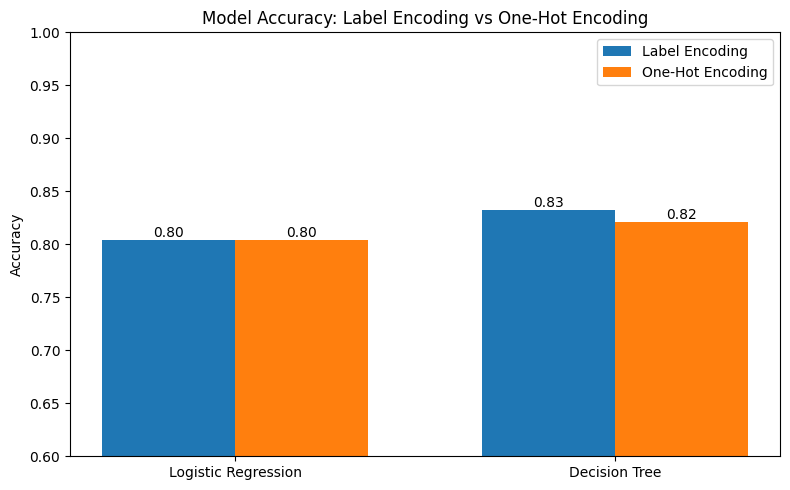

Logistic Regression Accuracy (Label Encoding): 0.8044692737430168
Logistic Regression Accuracy (One-Hot Encoding): 0.8044692737430168
Decision Tree Accuracy (Label Encoding): 0.8324022346368715
Decision Tree Accuracy (One-Hot Encoding): 0.8212290502793296


In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

df = sns.load_dataset("titanic")
df = df.drop(columns=["deck", "embark_town", "alive", "class", "who", "adult_male", "alone"], errors="ignore")
df["age"] = df["age"].fillna(df["age"].median())
df["embarked"] = df["embarked"].fillna(df["embarked"].mode()[0])
df["embarked"] = df["embarked"].astype(str)

X = df.drop(columns=["survived"])
y = df["survived"]

cat_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()
num_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train_le = X_train.copy()
X_test_le = X_test.copy()
le = LabelEncoder()
for col in cat_cols:
    X_train_le[col] = le.fit_transform(X_train_le[col])
    X_test_le[col] = le.transform(X_test_le[col])

scaler = StandardScaler()
X_train_le[num_cols] = scaler.fit_transform(X_train_le[num_cols])
X_test_le[num_cols] = scaler.transform(X_test_le[num_cols])

log_le = LogisticRegression(max_iter=1000, random_state=42)
log_le.fit(X_train_le, y_train)
acc_log_le = accuracy_score(y_test, log_le.predict(X_test_le))

tree_le = DecisionTreeClassifier(random_state=42)
tree_le.fit(X_train_le, y_train)
acc_tree_le = accuracy_score(y_test, tree_le.predict(X_test_le))

ct = ColumnTransformer(
    transformers=[
        ("onehot", OneHotEncoder(drop="first", sparse_output=False, handle_unknown="ignore"), cat_cols),
        ("scale", StandardScaler(), num_cols),
    ]
)
X_train_ohe = ct.fit_transform(X_train)
X_test_ohe = ct.transform(X_test)

log_ohe = LogisticRegression(max_iter=1000, random_state=42)
log_ohe.fit(X_train_ohe, y_train)
acc_log_ohe = accuracy_score(y_test, log_ohe.predict(X_test_ohe))

tree_ohe = DecisionTreeClassifier(random_state=42)
tree_ohe.fit(X_train_ohe, y_train)
acc_tree_ohe = accuracy_score(y_test, tree_ohe.predict(X_test_ohe))

models = ["Logistic Regression", "Decision Tree"]
encodings = ["Label Encoding", "One-Hot Encoding"]
acc_matrix = np.array([[acc_log_le, acc_log_ohe],
                       [acc_tree_le, acc_tree_ohe]])

x = np.arange(len(models))
width = 0.35
fig, ax = plt.subplots(figsize=(8, 5))
rects1 = ax.bar(x - width/2, acc_matrix[:, 0], width, label="Label Encoding")
rects2 = ax.bar(x + width/2, acc_matrix[:, 1], width, label="One-Hot Encoding")
ax.set_ylabel("Accuracy")
ax.set_title("Model Accuracy: Label Encoding vs One-Hot Encoding")
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.set_ylim(0.6, 1.0)
ax.legend()

for r in [rects1, rects2]:
    for rect in r:
        h = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, h, f"{h:.2f}", ha="center", va="bottom", fontsize=10)

plt.tight_layout()
plt.show()

print("Logistic Regression Accuracy (Label Encoding):", acc_log_le)
print("Logistic Regression Accuracy (One-Hot Encoding):", acc_log_ohe)
print("Decision Tree Accuracy (Label Encoding):", acc_tree_le)
print("Decision Tree Accuracy (One-Hot Encoding):", acc_tree_ohe)
